<a href="https://colab.research.google.com/github/mutturajiu/BA05-TRIM02-Module-04-Text-Analytics-/blob/master/Copy_of_Cisco_16Dec2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
1.Apply your financial and analytical knowledge to determine key trends and pattern in the data. What are your observations?

2.How can Stark predict future Cashflow for each line items?

3.If Stark has to make the prediction of "Net Income" for next 2 quarters, shall he use the line items-basedforecast or overall "Net Income" forecast? Why?

4.How can Stark make a forecast for items that don't show a trend?

5.Predict the "Net Income" for next 2 quarters? What business thought processes and/orstatisticaltechniques did you use? Why? How confident are you in your predictions? What would you advise to Stark?

In [0]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import pandas_profiling
import datetime as dt
import warnings
warnings.filterwarnings('ignore') 

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Dataset

In [0]:
#loading the data
df = pd.read_excel("cisco.xlsx", sheet_name="Data", skiprows=1, index_col=None)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Qtr Ending,Qtr Ending.1,Qtr Ending.2,Qtr Ending.3,Qtr Ending.4,Qtr Ending.5,Qtr Ending.6,Qtr Ending.7,Qtr Ending.8,Qtr Ending.9,Qtr Ending.10,Qtr Ending.11,Qtr Ending.12,Qtr Ending.13,Qtr Ending.14,Qtr Ending.15,Qtr Ending.16,Qtr Ending.17,Qtr Ending.18,Qtr Ending.19,Qtr Ending.20,Qtr Ending.21,Qtr Ending.22,Qtr Ending.23,Qtr Ending.24,Qtr Ending.25
0,NaN,NaN,2009-10-24 00:00:00,2010-01-23 00:00:00,2010-05-01 00:00:00,2010-07-31 00:00:00,2010-10-30 00:00:00,2011-01-29 00:00:00,2011-04-30 00:00:00,2011-07-30 00:00:00,2011-10-29 00:00:00,2012-01-28 00:00:00,2012-04-28 00:00:00,2012-07-28 00:00:00,2012-10-27 00:00:00,2013-01-26 00:00:00,2013-04-27 00:00:00,2013-07-27 00:00:00,2013-10-26 00:00:00,2014-01-25 00:00:00,2014-04-26 00:00:00,2014-07-26 00:00:00,2014-10-25 00:00:00,2015-01-24 00:00:00,2015-04-25 00:00:00,2015-07-25 00:00:00,2015-10-24 00:00:00,2016-01-23 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NET SALES:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Product,7200,7976,8436,8808,8700,8236,8669,8921,8952,9118,9106,9150,9297,9437,9559,9736,9397,8423,8820,9532,9435,9078,9326,9911,9844,8983
4,NaN,Service,1821,1839,1932,2028,2050,2171,2197,2274,2304,2409,2482,2540,2579,2661,2657,2681,2688,2732,2725,2825,2810,2858,2811,2932,2838,2944


# Data Preprocessing

In [4]:
df.dropna(how="all",inplace=True)
df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')
df['Unnamed: 1'] = df['Unnamed: 1'].fillna(df['Unnamed: 0']) 
df = df.T[1:]
df.rename(columns = {'Unnamed: 1':'Qtr'}, inplace=True)
df.columns = df.iloc[0]
df = df.drop(['NET SALES:', 'COST OF SALES:', 'OPERATING EXPENSES:'], axis=1)
df = df.reset_index(level = 0, drop=True)
df = df.drop(df.index[0])
columns = ['Qtr','NETSales_Product','NETSales_Service','Total_NETSales','COSTSales_Product','COSTSales_Service',
           'Total_COSTSales','GROSS_MARGIN','OPEX_R_D','OPEX_Sales_Marketing','OPEX_General_Administrative','OPEX_Intag_Assets','OPEX_Restruct_OtherCharges',
           'Total_OPEX','OPIN','Interest_Income','Interest_Expense','Other_Income','NetInterest_OtherIncome',
           'INCOME_BeforeTax', 'PROVISION_for_Income_Taxes','NET_INCOME']
df.columns = columns
df.head()
df.shape

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,2009-10-24,7200,1821,9021,2486,647,3133,5888,1224,2010,425,105,NaN,3764,2124,168,-114,61,115,2239,452,1787
2,2010-01-23,7976,1839,9815,2815,668,3483,6332,1247,2126,451,138,NaN,3962,2370,155,-158,-12,-15,2355,502,1853
3,2010-05-01,8436,1932,10368,3010,728,3738,6630,1411,2278,479,117,NaN,4285,2345,158,-182,82,58,2403,211,2192
4,2010-07-31,8808,2028,10836,3309,734,4043,6793,1391,2368,578,131,NaN,4468,2325,154,-169,108,93,2418,483,1935
5,2010-10-30,8700,2050,10750,3249,746,3995,6755,1431,2402,458,113,NaN,4404,2351,160,-166,80,74,2425,495,1930


(26, 22)

In [5]:
df['Qtr'] = df.index.values
df.head()
df.tail()

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,9021,2486,647,3133,5888,1224,2010,425,105,NaN,3764,2124,168,-114,61,115,2239,452,1787
2,2,7976,1839,9815,2815,668,3483,6332,1247,2126,451,138,NaN,3962,2370,155,-158,-12,-15,2355,502,1853
3,3,8436,1932,10368,3010,728,3738,6630,1411,2278,479,117,NaN,4285,2345,158,-182,82,58,2403,211,2192
4,4,8808,2028,10836,3309,734,4043,6793,1391,2368,578,131,NaN,4468,2325,154,-169,108,93,2418,483,1935
5,5,8700,2050,10750,3249,746,3995,6755,1431,2402,458,113,NaN,4404,2351,160,-166,80,74,2425,495,1930


,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
22,22,9078,2858,11936,3806,1040,4846,7090,1529,2308,490,72,69,4468,2622,189,-139,201,251,2873,476,2397
23,23,9326,2811,12137,3584,1028,4612,7525,1547,2449,510,70,24,4600,2925,190,-139,59,110,3035,598,2437
24,24,9911,2932,12843,4068,1042,5110,7733,1548,2549,536,146,73,4852,2881,211,-149,-10,52,2933,614,2319
25,25,9844,2838,12682,3853,997,4850,7832,1560,2443,539,69,142,4753,3079,225,-159,-8,58,3137,707,2430
26,26,8983,2944,11927,3480,1015,4495,7432,1509,2286,176,71,96,4138,3294,237,-162,-63,12,3306,159,3147


In [6]:
df.columns
df.info()

Index(['Qtr', 'NETSales_Product', 'NETSales_Service', 'Total_NETSales',
       'COSTSales_Product', 'COSTSales_Service', 'Total_COSTSales',
       'GROSS_MARGIN', 'OPEX_R_D', 'OPEX_Sales_Marketing',
       'OPEX_General_Administrative', 'OPEX_Intag_Assets',
       'OPEX_Restruct_OtherCharges', 'Total_OPEX', 'OPIN', 'Interest_Income',
       'Interest_Expense', 'Other_Income', 'NetInterest_OtherIncome',
       'INCOME_BeforeTax', 'PROVISION_for_Income_Taxes', 'NET_INCOME'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 22 columns):
Qtr                            26 non-null int64
NETSales_Product               26 non-null object
NETSales_Service               26 non-null object
Total_NETSales                 26 non-null object
COSTSales_Product              26 non-null object
COSTSales_Service              26 non-null object
Total_COSTSales                26 non-null object
GROSS_MARGIN                   26 non-null object
OPEX_R_D                       26 non-null object
OPEX_Sales_Marketing           26 non-null object
OPEX_General_Administrative    26 non-null object
OPEX_Intag_Assets              26 non-null object
OPEX_Restruct_OtherCharges     20 non-null object
Total_OPEX                     26 non-null object
OPIN                           26 non-null object
Interest_Income                26 non-null object
Interest_Expense               26 non-null object
Other_Income                   26 non-null objec

In [7]:
df.describe()
df.info()

,Qtr
count,26.000000
mean,13.500000
std,7.648529
min,1.000000
25%,7.250000
50%,13.500000
75%,19.750000
max,26.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1 to 26
Data columns (total 22 columns):
Qtr                            26 non-null int64
NETSales_Product               26 non-null object
NETSales_Service               26 non-null object
Total_NETSales                 26 non-null object
COSTSales_Product              26 non-null object
COSTSales_Service              26 non-null object
Total_COSTSales                26 non-null object
GROSS_MARGIN                   26 non-null object
OPEX_R_D                       26 non-null object
OPEX_Sales_Marketing           26 non-null object
OPEX_General_Administrative    26 non-null object
OPEX_Intag_Assets              26 non-null object
OPEX_Restruct_OtherCharges     20 non-null object
Total_OPEX                     26 non-null object
OPIN                           26 non-null object
Interest_Income                26 non-null object
Interest_Expense               26 non-null object
Other_Income                   26 non-null objec

In [0]:
eda_report = pandas_profiling.ProfileReport(df)
eda_report.to_file('Customer.html')

# Splitting the data into 3 sub data sets
Dataset 1 - Individual Items (Without Totals),
Dataset 2 - Item Sub Totals,
Dataset 3 - Net Income

# dataset 1

In [9]:
df_items = df.loc[:,('Qtr','NETSales_Product', 'NETSales_Service', 'COSTSales_Product', 'COSTSales_Service', 
                     'OPEX_R_D', 'OPEX_Sales_Marketing', 'OPEX_General_Administrative', 'OPEX_Intag_Assets', 'OPEX_Restruct_OtherCharges',
                    'Interest_Income','Interest_Expense','Other_Income','PROVISION_for_Income_Taxes','NET_INCOME')]
df_items.head()
df_items.shape

,Qtr,NETSales_Product,NETSales_Service,COSTSales_Product,COSTSales_Service,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Interest_Income,Interest_Expense,Other_Income,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,2486,647,1224,2010,425,105,NaN,168,-114,61,452,1787
2,2,7976,1839,2815,668,1247,2126,451,138,NaN,155,-158,-12,502,1853
3,3,8436,1932,3010,728,1411,2278,479,117,NaN,158,-182,82,211,2192
4,4,8808,2028,3309,734,1391,2368,578,131,NaN,154,-169,108,483,1935
5,5,8700,2050,3249,746,1431,2402,458,113,NaN,160,-166,80,495,1930


(26, 15)

# dataset2

In [10]:
df_item_totals = df.loc[:,('Qtr','Total_NETSales', 'Total_COSTSales', 'GROSS_MARGIN','Total_OPEX', 'OPIN', 'NetInterest_OtherIncome','INCOME_BeforeTax','PROVISION_for_Income_Taxes', 'NET_INCOME')]
df_item_totals.head()
df_item_totals.shape

,Qtr,Total_NETSales,Total_COSTSales,GROSS_MARGIN,Total_OPEX,OPIN,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,1,9021,3133,5888,3764,2124,115,2239,452,1787
2,2,9815,3483,6332,3962,2370,-15,2355,502,1853
3,3,10368,3738,6630,4285,2345,58,2403,211,2192
4,4,10836,4043,6793,4468,2325,93,2418,483,1935
5,5,10750,3995,6755,4404,2351,74,2425,495,1930


(26, 10)

# dataset 3

In [11]:
df_NetIncome = pd.DataFrame(df,columns=['Qtr','NET_INCOME'])
df_NetIncome.head()
df_NetIncome.shape

,Qtr,NET_INCOME
1,1,1787
2,2,1853
3,3,2192
4,4,1935
5,5,1930


(26, 2)

# visualize the net income trend

<Figure size 1000x600 with 0 Axes>

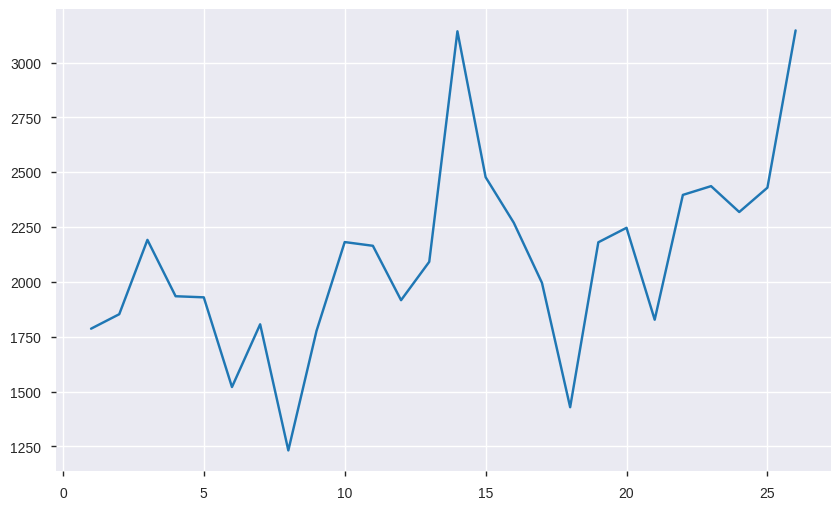

In [12]:
#plot
plt.figure(figsize=(10,6))
plt.plot(df_NetIncome['NET_INCOME'], label='NET_INCOME')

# using scikit learn

In [0]:
#implement linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
df_items.head()

,Qtr,NETSales_Product,NETSales_Service,COSTSales_Product,COSTSales_Service,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Interest_Income,Interest_Expense,Other_Income,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,2486,647,1224,2010,425,105,NaN,168,-114,61,452,1787
2,2,7976,1839,2815,668,1247,2126,451,138,NaN,155,-158,-12,502,1853
3,3,8436,1932,3010,728,1411,2278,479,117,NaN,158,-182,82,211,2192
4,4,8808,2028,3309,734,1391,2368,578,131,NaN,154,-169,108,483,1935
5,5,8700,2050,3249,746,1431,2402,458,113,NaN,160,-166,80,495,1930


In [0]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [0]:
regressor = LinearRegression()  

In [0]:
X =  df_items.iloc[:,1:25]
y =  df_items.iloc[:,25:]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,  random_state=None, shuffle=False)

In [20]:
df.head()

,Qtr,NETSales_Product,NETSales_Service,Total_NETSales,COSTSales_Product,COSTSales_Service,Total_COSTSales,GROSS_MARGIN,OPEX_R_D,OPEX_Sales_Marketing,OPEX_General_Administrative,OPEX_Intag_Assets,OPEX_Restruct_OtherCharges,Total_OPEX,OPIN,Interest_Income,Interest_Expense,Other_Income,NetInterest_OtherIncome,INCOME_BeforeTax,PROVISION_for_Income_Taxes,NET_INCOME
1,1,7200,1821,9021,2486,647,3133,5888,1224,2010,425,105,NaN,3764,2124,168,-114,61,115,2239,452,1787
2,2,7976,1839,9815,2815,668,3483,6332,1247,2126,451,138,NaN,3962,2370,155,-158,-12,-15,2355,502,1853
3,3,8436,1932,10368,3010,728,3738,6630,1411,2278,479,117,NaN,4285,2345,158,-182,82,58,2403,211,2192
4,4,8808,2028,10836,3309,734,4043,6793,1391,2368,578,131,NaN,4468,2325,154,-169,108,93,2418,483,1935
5,5,8700,2050,10750,3249,746,3995,6755,1431,2402,458,113,NaN,4404,2351,160,-166,80,74,2425,495,1930


In [0]:

# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [0]:
# Function to impute Outliers with Mean

def outliers(Y_OL):
    final_list=[]
    elements = np.array(Y_OL)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)

    for a in Y_OL:
        if ((a > mean - 2 * sd) and (a < mean + 2 * sd)):
            final_list.append(a)
        else:
            final_list.append(mean)

    return final_list


# Function to find the Coefficients
def coeff(X,Y):

    # Total number of values
    m = len(X)

    # Using the formula to calculate b1 and b2
    numer = 0
    denom = 0
    for i in range(m):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
    b1 = numer / denom
    b0 = mean_y - (b1 * mean_x)

    return[b0, b1]

# Calculating Root Mean Squares Error
def rms(X,Y,m):
    rmse = 0
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        rmse += (Y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/m)
    #print(rmse)
    return rmse    
    # Calculating the Root Square
def r_square(X,Y):
    ss_t = 0
    ss_r = 0
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        ss_t += (Y[i] - mean_y) ** 2
        ss_r += (Y[i] - y_pred) ** 2
        
    r2 = 1 - (ss_r/ss_t)
    
    return r2

def ypred(X,Y):
    ypredicted = []
    for i in range(m):
        y_pred = b0 + b1 * X[i]
        ypredicted.append(y_pred)
    return ypredicted

In [23]:
df2 = pd.DataFrame()
df_ypredicted = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
Y=[]
for column in df_items:
    X = df_items['Qtr'].values
    Y_OL = df_items[column].values
    m = len(X)
    df2['Items'] = df_items.columns
    Y = outliers(Y_OL)
    # Mean X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    b0, b1 = coeff(X,Y)
    lst_coeff.append([b0, b1])
    lst_rmse.append(rms(X,Y,m))
    lst_r2.append(r_square(X,Y))
    lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 27) 
    lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 28) 
df2['Coefficients'] = lst_coeff
df2['RMSE'] = lst_rmse
df2['R_Square'] = lst_r2
df2['Qtr_27_Predicted'] = lst_ypred27
df2['Qtr_28_Predicted'] = lst_ypred28
df_ypredicted['Qtr'] = df['Qtr']
df_ypredicted['Predicted'] = ypred(X,Y)
df2.index = df2['Items']
df2 = df2.drop('Items', axis=1)
df2 = df2.drop(df2.index[0])
df2

TypeError: ignored

In [24]:
NET_SALES = df2.Qtr_27_Predicted[0] + df2.Qtr_27_Predicted[1]

COST_OF_SALES = df2.Qtr_27_Predicted[2] + df2.Qtr_27_Predicted[3]

OPEX = df2.Qtr_27_Predicted[4] + df2.Qtr_27_Predicted[5] + df2.Qtr_27_Predicted[6] + df2.Qtr_27_Predicted[7] + df2.Qtr_27_Predicted[8] 

NET_INEREST_INCOME = df2.Qtr_27_Predicted[9] + df2.Qtr_27_Predicted[10] + df2.Qtr_27_Predicted[11]

PROVISION_for_Income_Taxes = df2.Qtr_27_Predicted[12]

NET_INCOME1 = NET_SALES - COST_OF_SALES - OPEX + NET_INEREST_INCOME - PROVISION_for_Income_Taxes

print("Net Income for Qtr 27 is :", NET_INCOME1)

AttributeError: ignored

In [25]:
NET_SALES = df2.Qtr_28_Predicted[0] + df2.Qtr_28_Predicted[1]

COST_OF_SALES = df2.Qtr_28_Predicted[2] + df2.Qtr_28_Predicted[3]

OPEX = df2.Qtr_28_Predicted[4] + df2.Qtr_28_Predicted[5] + df2.Qtr_28_Predicted[6] + df2.Qtr_28_Predicted[7] + df2.Qtr_28_Predicted[8] 

NET_INEREST_INCOME = df2.Qtr_28_Predicted[9] + df2.Qtr_28_Predicted[10] + df2.Qtr_28_Predicted[11]

PROVISION_for_Income_Taxes = df2.Qtr_28_Predicted[12]

NET_INCOME2 = NET_SALES - COST_OF_SALES - OPEX + NET_INEREST_INCOME - PROVISION_for_Income_Taxes

print("Net Income for Qtr 28 is :", NET_INCOME2)

AttributeError: ignored

In [26]:
# Plotting Values and Regression Line
Qtr_pred = [27,28]
predicted = [NET_INCOME1, NET_INCOME2]
X = df['Qtr']
max_x = np.max(X) + 1
min_x = np.min(X) - 1
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.scatter(Qtr_pred, predicted, c='red', label='Scatter Plot')
plt.scatter(df_ypredicted['Qtr'], df_ypredicted['Predicted'], c='brown', label='Scatter Plot')

plt.xlabel('Qtr')
plt.ylabel('Net Income')
plt.legend()
plt.show()

NameError: ignored

In [27]:
df2 = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
Y=[]
for column in df_item_totals:
    X = df_item_totals['Qtr'].values
    Y_OL = df_item_totals[column].values
    m = len(X)
    df2['Items'] = df_item_totals.columns
    Y = outliers(Y_OL)
    # Mean X and Y
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    b0, b1 = coeff(X,Y)
    lst_coeff.append([b0, b1])
    lst_rmse.append(rms(X,Y,m))
    lst_r2.append(r_square(X,Y))
    lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 27) 
    lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 28) 
df2['Coefficients'] = lst_coeff
df2['RMSE'] = lst_rmse
df2['R_Square'] = lst_r2
df2['Qtr_27_Predicted'] = lst_ypred27
df2['Qtr_28_Predicted'] = lst_ypred28

df2.index = df2['Items']
df2 = df2.drop('Items', axis=1)
df2 = df2.drop(df2.index[0])
df2

,Coefficients,RMSE,R_Square,Qtr_27_Predicted,Qtr_28_Predicted
Items,,,,,
Total_NETSales,"[10511.770650887574, 79.78556213017751]",437.949932,0.651192,12665.980828,12745.766391
Total_COSTSales,"[4103.432426035503, 34.007416173570014]",240.920383,0.528477,5021.632663,5055.640079
GROSS_MARGIN,"[6548.204497041421, 41.28596975673898]",226.583438,0.651270,7662.925680,7704.211650
Total_OPEX,"[4379.614556213018, 11.366048652202496]",209.494600,0.142055,4686.497870,4697.863918
OPIN,"[2130.7426035502954, 29.104865220249835]",305.609540,0.337825,2916.573964,2945.678830
NetInterest_OtherIncome,"[38.80307692307692, 0.5466929651545037]",39.146364,0.010851,53.563787,54.110480
INCOME_BeforeTax,"[2165.472781065089, 30.6370151216305]",294.118879,0.379012,2992.672189,3023.309204
PROVISION_for_Income_Taxes,"[394.9224852071006, 5.191913214990137]",129.381897,0.083056,535.104142,540.296055
NET_INCOME,"[1824.8340828402368, 17.19353057199211]",232.596202,0.235100,2289.059408,2306.252939


In [28]:
NET_INCOME1 = df2.Qtr_27_Predicted[0] - df2.Qtr_27_Predicted[1] - df2.Qtr_27_Predicted[3] + df2.Qtr_27_Predicted[5] - df2.Qtr_27_Predicted[7]


print("Net Income for Qtr 27 is :", NET_INCOME1)

Net Income for Qtr 27 is : 2476.3099408284024


In [29]:
NET_INCOME2 = df2.Qtr_28_Predicted[0] - df2.Qtr_28_Predicted[1] - df2.Qtr_28_Predicted[3] + df2.Qtr_28_Predicted[5] - df2.Qtr_28_Predicted[7]


print("Net Income for Qtr 28 is :", NET_INCOME2)

Net Income for Qtr 28 is : 2506.076817882971


In [30]:
# Plotting Values and Regression Line
Qtr_pred = [27,28]
predicted = [NET_INCOME1, NET_INCOME2]
X = df['Qtr']

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.scatter(Qtr_pred, predicted, c='red', label='Scatter Plot')
plt.scatter(df_ypredicted['Qtr'], df_ypredicted['Predicted'], c='brown', label='Scatter Plot')

plt.xlabel('Qtr')
plt.ylabel('Net Income')
plt.legend()
plt.show()

NameError: ignored

In [31]:
df3 = pd.DataFrame()
lst_rmse = []
lst_r2=[]
lst_coeff = []
lst_ypred27 = []
lst_ypred28 = []
lst_y_pred = []
Y=[]
X = df['GROSS_MARGIN'].values
Y_OL = df['NET_INCOME'].values
Y = outliers(Y_OL)
m = len(X)
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
b0, b1 = coeff(X,Y)
lst_coeff.append([b0, b1])
lst_rmse.append(rms(X,Y,m))
lst_r2.append(r_square(X,Y))
lst_ypred27.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 7664.426561) 
lst_ypred28.append(coeff(X,Y)[0] + coeff(X,Y)[1] * 7712.078297) 
df3['Coefficients'] = lst_coeff
df3['RMSE'] = lst_rmse
df3['R_Square'] = lst_r2
df3['Qtr_27_Predicted'] = lst_ypred27
df3['Qtr_28_Predicted'] = lst_ypred28

for i in range(m):
    y_pred = b0 + b1 * X[i]
    lst_y_pred.append(y_pred)

df_Gross_Margin = pd.DataFrame()
df_Gross_Margin['Qtr']= df['Qtr']
df_Gross_Margin['GROSS_MARGIN'] = df['GROSS_MARGIN'] 
df_Gross_Margin['NET_INCOME'] = Y 
df_Gross_Margin['NET_INCOME_Predicted'] = lst_y_pred

df_Gross_Margin

df3

,Qtr,GROSS_MARGIN,NET_INCOME,NET_INCOME_Predicted
1,1,5888,1787.000000,1588.410348
2,2,6332,1853.000000,1772.045310
3,3,6630,2192.000000,1895.295803
4,4,6793,1935.000000,1962.711341
5,5,6755,1930.000000,1946.994835
6,6,6261,1521.000000,1742.680260
7,7,6659,1807.000000,1907.289978
8,8,6861,2103.538462,1990.835614
9,9,6890,1777.000000,2002.829790
10,10,7065,2182.000000,2075.208434


,Coefficients,RMSE,R_Square,Qtr_27_Predicted,Qtr_28_Predicted
0,"[-846.8208593239965, 0.4135922567246951]",168.359306,0.59925,2323.126619,2342.835008


Text(0.5, 1.0, 'Actual Net Income vs Predicted Net Income')

Text(0.5, 0, 'Actual Net Income')

Text(0, 0.5, 'Predicted Net Income')

No handles with labels found to put in legend.


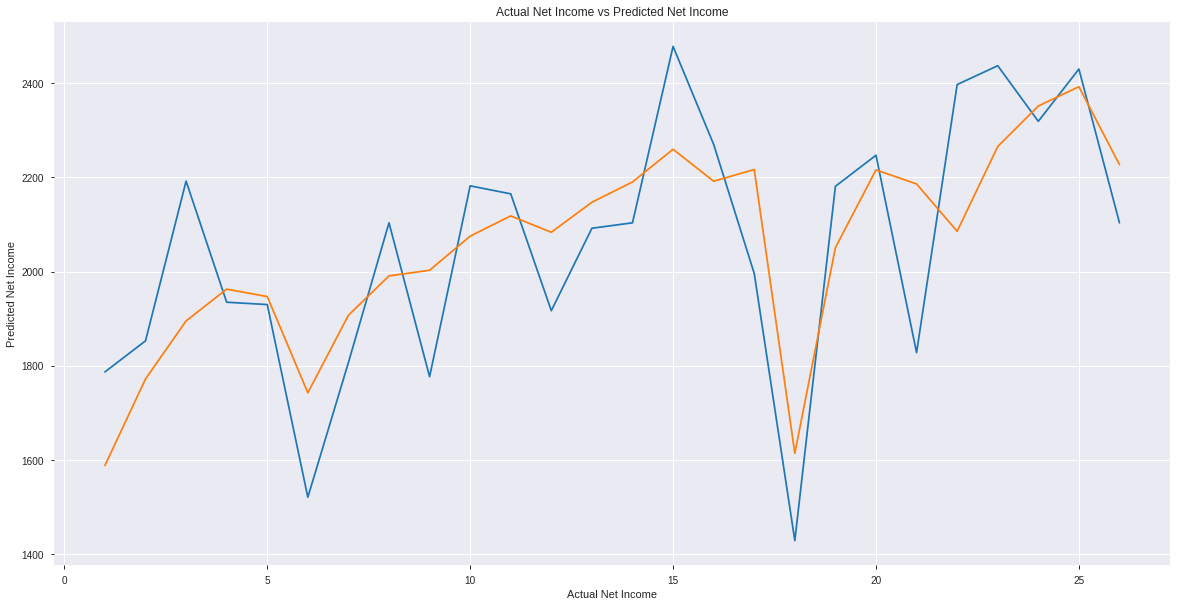

In [32]:
plt.plot(df_Gross_Margin['NET_INCOME'])
plt.plot(df_Gross_Margin['NET_INCOME_Predicted'])
plt.title("Actual Net Income vs Predicted Net Income")
plt.xlabel('Actual Net Income')
plt.ylabel('Predicted Net Income')
plt.legend()

In [0]:
#implement linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
X =  df_items.iloc[:,1:14]
Y =  df_items.iloc[:,14:]

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,  random_state=None, shuffle=False)

In [42]:
slr = LinearRegression()
slr.fit(X_train,y_train)

#make predictions and find the rmse

y_pred = slr.predict(X_test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE Value :", rmse)
print("R-Squared Value :", r2)

ValueError: ignored